<a href="https://colab.research.google.com/github/hiro106/statistics-ml-cs-learning/blob/main/Fastest_dimension_of_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the fastest axis of an array?  
https://agilescientific.com/blog/2018/12/28/what-is-the-fastest-axis-of-an-array

https://github.com/agilescientific/notebooks/blob/master/Fastest_dimension_of_array.ipynb

トレース＆カスタマイズで理解する  
I'm comprehending the contents of the notebook above by tracing and customizing the code on it.

# Which is the fastest axis of an array?

I'd like to know: which axes of a NumPy array are fastest to access?

In [1]:
import numpy as np

In [2]:
np

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>

In [3]:
%matplotlib inline

In [4]:
matplotlib

Using matplotlib backend: agg


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

## A tiny example

In [7]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [8]:
' '.join(str(i) for i in a.ravel(order='C'))

'0 1 2 3 4 5 6 7 8'

In [9]:
' '.join(str(i) for i in a.ravel(order='F'))

'0 3 6 1 4 7 2 5 8'

## A seismic volume

In [10]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [11]:
volume = np.load("/drive/My Drive/Colab Notebooks/data/F3_volume_3x3_16bit.npy")

In [12]:
volume

array([[[    0,     0,     0, ...,  1779,  1476,  -129],
        [    0,     0,     0, ...,  1175,  -273,   598],
        [    0,     0,     0, ...,   574,  -526,   302],
        ...,
        [-1209, -1209, -1209, ...,  4127,  1873,  2032],
        [ -151,  -151,  -151, ...,  3619,  2145,  1522],
        [ -864,  -864,  -864, ...,  4260,  2667,   405]],

       [[-1018, -1018, -1018, ...,  1050,  1238,   189],
        [-1173, -1173, -1173, ...,  1310,   324,   289],
        [ -417,  -417,  -417, ...,   823,  -466,   447],
        ...,
        [-2029, -2029, -2029, ...,  3973,   363,   468],
        [-1869, -1869, -1869, ...,  3741,  1296,   967],
        [-1065, -1065, -1065, ...,  3327,  2041,  1132]],

       [[ -425,  -425,  -425, ...,   -12,  1142,  1162],
        [  -42,   -42,   -42, ...,   760,  -109,   136],
        [ -443,  -443,  -443, ...,    25,  -615,   195],
        ...,
        [    0,     0,     0, ...,  3430,   638,   804],
        [ -490,  -490,  -490, ...,  3741,  11

In [13]:
volume.shape

(194, 299, 451)

Let's look at how the indices vary:

In [14]:
idx = np.indices(volume.shape)

In [15]:
idx.shape

(3, 194, 299, 451)

In [16]:
idx

array([[[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],

        [[  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         ...,
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1],
         [  1,   1,   1, ...,   1,   1,   1]],

        [[  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         ...,
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2],
         [  2,   2,   2, ...,   2,   2,   2]],

        ...,

        [[191, 191, 191, ..., 191, 191, 191],
         [191, 191, 191, ..., 191, 191, 191],
         [191, 191

In [17]:
from matplotlib.font_manager import FontProperties

In [18]:
annot = ['data[2, :, :]', 'data[:, 2, :]', 'data[:, :, 2]']

In [19]:
annot

['data[2, :, :]', 'data[:, 2, :]', 'data[:, :, 2]']

In [20]:
mono = FontProperties()

In [21]:
mono

In [22]:
mono.set_family('monospace')

In [23]:
mono

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3), facecolor='w')

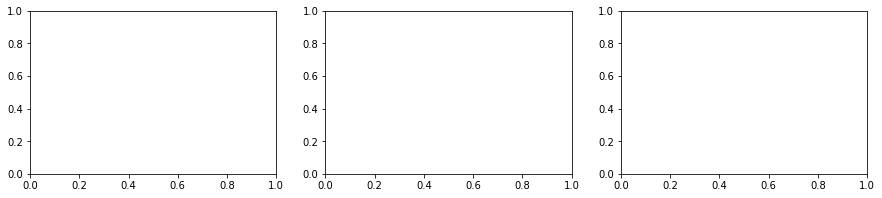

In [25]:
fig

In [26]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0698fd710>,
      dtype=object)

In [27]:
for i, ax in enumerate(axs):
    data = idx[i, :5, :5, :5].ravel(order='C')
    ax.plot(data, c=f'C{i}')
    ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)
    

In [28]:
data

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [29]:
data_ax0 = idx[0, :5, :5, :5]

In [30]:
data_ax0

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]],

       [[3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]],

       [[4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4]]])

In [31]:
data_ax1 = idx[1, :5, :5, :5]
data_ax1

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]])

In [32]:
data_ax2 = idx[2, :5, :5, :5]
data_ax2

array([[[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [33]:
data_c = data.ravel(order='C')
data_c

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [34]:
data_f = data.ravel(order='F')
data_f

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [35]:
data = idx[i, :5, :5, :5].ravel(order='C')

In [36]:
data

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [37]:
# ax.plot(data, c=f'C0')

In [38]:
# ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)

In [39]:
# ax.text(65, 4.3, 'axis 0', color='C0', size=15, ha='center')

"CN" color spec where 'C' precedes a number acting as an index into the default property cycle.  
https://matplotlib.org/stable/tutorials/colors/colors.html

In [40]:
# ax.text(65, -0.7, annot[0], color='red', size=12, ha='center', fontproperties=mono)

In [41]:
ax.set_ylim(-1, 5)

(-1.0, 5.0)

In [42]:
for i, ax in enumerate(axs):
    data = idx[i, :5, :5, :5].ravel(order='C')
    ax.plot(data, c=f'C{i}')
    ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)
    ax.text(65, 4.3, f'axis {i}', color=f'C{i}', size=15, ha='center')
    ax.text(65, -0.7, annot[i], color='red', size=12, ha='center', fontproperties=mono)
    ax.set_ylim(-1, 5)

In [43]:
_ = plt.suptitle("C order", size=18)

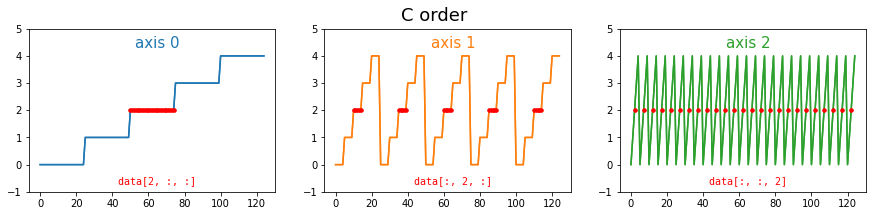

In [44]:
fig

In [45]:
plt.savefig("/drive/My Drive/Colab Notebooks/3d-array-corder.png")

In [46]:
for i, ax in enumerate(axs):
    print(i, ax)

0 AxesSubplot(0.125,0.125;0.227941x0.755)
1 AxesSubplot(0.398529,0.125;0.227941x0.755)
2 AxesSubplot(0.672059,0.125;0.227941x0.755)


In [47]:
# tested the behaviors of np.indices in 'numpy.indices.ipynb'.

In [48]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 3), facecolor='w')

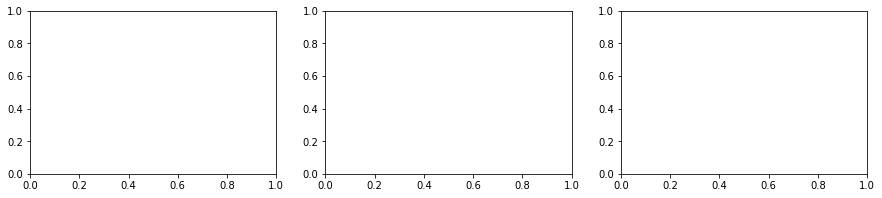

In [49]:
fig

In [50]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb068fe6890>,
      dtype=object)

In [51]:
for i, ax in enumerate(axs):
    data = idx[i, :5, :5, :5].ravel(order='F')
    ax.plot(data, c=f'C{i}')
    ax.scatter(np.where(data==2), data[data==2], color='r', s=10, zorder=10)
    ax.text(65, 4.3, f'axis {i}', color=f'C{i}', size=15, ha='center')
    ax.text(65, -0.7, annot[i], color='red', size=12, ha='center', fontproperties=mono)
    ax.set_ylim(-1, 5)
_ = plt.suptitle("Fortran order", size=18)
plt.savefig('/drive/My Drive/Colab Notebooks/3d-array-forder.png')

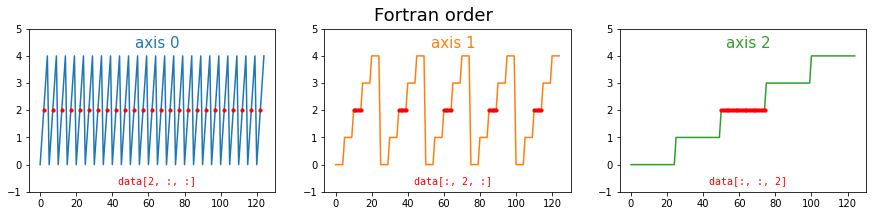

In [52]:
fig

In [53]:
fig_together = plt.figure(figsize=(15, 3))
plt.plot(idx[0, :5, :5, :5].ravel(), zorder=10)
plt.plot(idx[1, :5, :5, :5].ravel(), zorder=9)
plt.plot(idx[2, :5, :5, :5].ravel(), zorder=8)

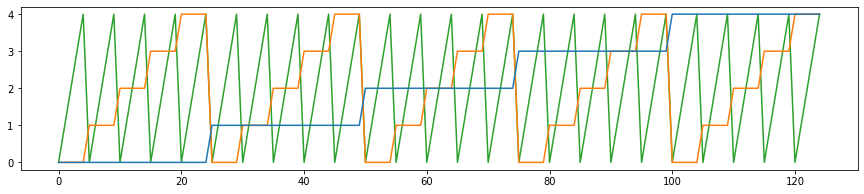

In [54]:
fig_together

In [55]:
volume.strides

(269698, 902, 2)

# Aside: figure for blog post

In [56]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3), facecolor='w')

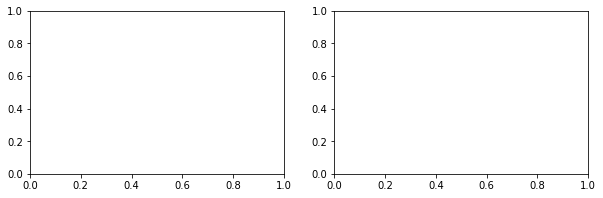

In [57]:
fig

In [58]:
for i, ax in enumerate(axs):
    data = idx[i, :3, :3, 0].ravel(order='C')
    ax.plot(data, 'o-', c='gray')
    ax.text(0, 1.8, f'axis {i}', color='gray', size=15, ha='left')
plt.savefig('/drive/My Drive/Colab Notebooks/2d-array-corder.png')

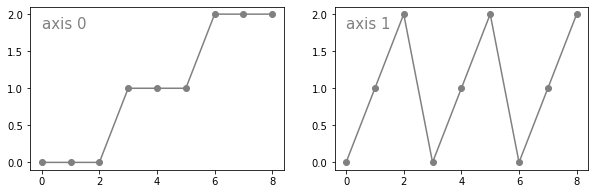

In [59]:
fig

In [60]:
idx[0, :3, :3, :3]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]])

In [61]:
idx[0, :3, :3, :3].ravel(order='C')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [62]:
idx[1, :3, :3, :3]

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]])

In [63]:
idx[1, :3, :3, :3].ravel(order='C')

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 2])

In [64]:
idx[2, :3, :3, :3]

array([[[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

In [65]:
idx[2, :3, :3, :3].ravel(order='C')

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2])

#Accessing the seismic data

## ndarray.strides

numpy.ndarray.strides  
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.strides.html

Bits and Bytes  
https://web.stanford.edu/class/cs101/bits-bytes.html

2,147,483,647  
https://en.wikipedia.org/wiki/2,147,483,647#:~:text=The%20number%202%2C147%2C483%2C647%20(or%20hexadecimal,int%20)%20in%20many%20programming%20languages.

Gangnam Style overflows INT_MAX, forces YouTube to go 64-bit  
https://arstechnica.com/information-technology/2014/12/gangnam-style-overflows-int_max-forces-youtube-to-go-64-bit/

メルセンヌ素数  
https://ja.wikipedia.org/wiki/%E3%83%A1%E3%83%AB%E3%82%BB%E3%83%B3%E3%83%8C%E6%95%B0

Let's make all the dimensions the same, to avoid having to slice later. I'll make a copy, otherwise we'll have a view of the original array.

Alternatively, change the shape here to see effect of small dimensions, eg `try volume = volume[:10, :290, :290]` with C ordering.

Python初心者向けJupyter NotebookでセルにMarkdown記法で入力する方法
https://tonari-it.com/python-jupyter-notebook-markdown/

In [66]:
volume = volume[:190, :190, :190].copy()

In [67]:
volume

array([[[    0,     0,     0, ..., -1572, -2179,   -40],
        [    0,     0,     0, ..., -3173, -1118,  1754],
        [    0,     0,     0, ..., -3116,   440,  2874],
        ...,
        [    0,     0,     0, ...,  -203,   807,   272],
        [ -407,  -407,  -407, ...,   901,   269,  -782],
        [    0,     0,     0, ...,   482, -1240,  -676]],

       [[-1018, -1018, -1018, ..., -1740, -2042,  1227],
        [-1173, -1173, -1173, ..., -2627,  -414,  2853],
        [ -417,  -417,  -417, ..., -2529,  -249,  2811],
        ...,
        [-1509, -1509, -1509, ...,   603,  -404,  -367],
        [ -523,  -523,  -523, ...,  -258, -1396,  -163],
        [ -886,  -886,  -886, ...,  -990, -1417,   798]],

       [[ -425,  -425,  -425, ..., -1520, -3207,  1019],
        [  -42,   -42,   -42, ..., -3645, -1818,  3129],
        [ -443,  -443,  -443, ..., -2935,   282,  3299],
        ...,
        [ -681,  -681,  -681, ...,   335,  -630,     3],
        [    0,     0,     0, ...,  -636, -14

In [68]:
volume.shape

(190, 190, 190)

In [69]:
np.diff(volume.shape)

array([0, 0])

In [70]:
np.sum(np.diff(volume.shape))

0

###np.sum  
https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [71]:
np.sum([0.9, 0.9], dtype=np.int32)

0

In [72]:
np.sum([0.9, 0.9, 0.9], dtype=np.int32)

0

In [73]:
np.sum([0.9, 0.9, 1.9, 1.9], dtype=np.int32)

2

In [74]:
np.sum([1.9], dtype=np.int32)

1

In [75]:
np.sum([[0, 1], [0,5]])

6

In [76]:
np.sum([[1, 2], [3, 4]])

10

In [77]:
np.sum([[1, 2], [3, 4, 5]])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[1, 2, 3, 4, 5]

In [78]:
np.sum([[2, 3], [4, 5]])

14

In [79]:
np.sum([[2, 3], [4, 5]], axis=0)

array([6, 8])

In [80]:
np.sum([[2, 3], [4, 5]], axis=1)

array([5, 9])

In [81]:
np.sum([[0, 1], [np.nan, 5]], where=[False, True], axis=1)

array([1., 5.])

In [82]:
def get_slice_3d(volume, x, axis, n=None):
    """
    Naive function... but only works on 3 dimensions.
    NB Using ellipses slows down last axis.
    """
    # Force cube shape
    if n is None and not np.sum(np.diff(volume.shape)):
        n = np.min(volume.shape)
    if axis == 0:
        data = volume[x, :n, :n]
    if axis == 1:
        data = volume[:n, x, :n]
    if axis == 2:
        data = volume[:n, :n, x]
    return data + 1

In [83]:
get_slice_3d

<function __main__.get_slice_3d(volume, x, axis, n=None)>

In [84]:
%timeit get_slice_3d(volume, 150, axis=0)
%timeit get_slice_3d(volume, 150, axis=1)
%timeit get_slice_3d(volume, 150, axis=2)

25.6 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
143 µs ± 5.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [85]:
volumef = np.asfortranarray(volume)

In [86]:
volumef

array([[[    0,     0,     0, ..., -1572, -2179,   -40],
        [    0,     0,     0, ..., -3173, -1118,  1754],
        [    0,     0,     0, ..., -3116,   440,  2874],
        ...,
        [    0,     0,     0, ...,  -203,   807,   272],
        [ -407,  -407,  -407, ...,   901,   269,  -782],
        [    0,     0,     0, ...,   482, -1240,  -676]],

       [[-1018, -1018, -1018, ..., -1740, -2042,  1227],
        [-1173, -1173, -1173, ..., -2627,  -414,  2853],
        [ -417,  -417,  -417, ..., -2529,  -249,  2811],
        ...,
        [-1509, -1509, -1509, ...,   603,  -404,  -367],
        [ -523,  -523,  -523, ...,  -258, -1396,  -163],
        [ -886,  -886,  -886, ...,  -990, -1417,   798]],

       [[ -425,  -425,  -425, ..., -1520, -3207,  1019],
        [  -42,   -42,   -42, ..., -3645, -1818,  3129],
        [ -443,  -443,  -443, ..., -2935,   282,  3299],
        ...,
        [ -681,  -681,  -681, ...,   335,  -630,     3],
        [    0,     0,     0, ...,  -636, -14

###np.diff  
https://numpy.org/doc/stable/reference/generated/numpy.diff.html

In [87]:
x = np.array([1, 2, 4, 7, 0])

In [88]:
x

array([1, 2, 4, 7, 0])

In [89]:
np.diff(x)

array([ 1,  2,  3, -7])

In [90]:
x = np.array([[1, 3, 6, 10], [0, 5, 6, 8]])

In [91]:
x

array([[ 1,  3,  6, 10],
       [ 0,  5,  6,  8]])

In [92]:
np.diff(x)

array([[2, 3, 4],
       [5, 1, 2]])

In [93]:
x

array([[ 1,  3,  6, 10],
       [ 0,  5,  6,  8]])

In [94]:
np.diff(x, axis=0)

array([[-1,  2,  0, -2]])

In [95]:
x = np.arange('1066-10-13', '1066-10-16', dtype=np.datetime64)

In [96]:
x

array(['1066-10-13', '1066-10-14', '1066-10-15'], dtype='datetime64[D]')

In [97]:
np.diff(x)

array([1, 1], dtype='timedelta64[D]')

###np.asfortranarray  
https://numpy.org/doc/stable/reference/generated/numpy.asfortranarray.html

In [98]:
x = np.arange(6).reshape(2,3)

In [99]:
x

array([[0, 1, 2],
       [3, 4, 5]])

In [100]:
y = np.asfortranarray(x)

In [101]:
y

array([[0, 1, 2],
       [3, 4, 5]])

In [102]:
x.flags['F_CONTIGUOUS']

False

In [103]:
y.flags['F_CONTIGUOUS']

True

In [104]:
# Deviate from the main subject

# An Illustrated Guide to Shape and Strides (Part 1)  
https://ajcr.net/stride-guide-part-1/  
*The series consists of three parts.

## 1. Array Fundamentals

In [105]:
a = np.arange(12)

In [106]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [107]:
b = a.reshape(3, 4)

In [108]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [109]:
a.shape

(12,)

In [110]:
a.strides

(8,)

In [111]:
b.shape

(3, 4)

In [112]:
b.strides

(32, 8)

In [113]:
a.itemsize

8

In [114]:
b.itemsize

8

In [115]:
a.data

In [116]:
b.data

Array operations such as **reshaping, transposing, indexing, slicing** can be thought of as convenient high-level methods to manipulate **shape, strides** and **offset** to change how data in memory is traversed.

## 2. How Shape and Strides Define Dimensions

In [117]:
a2 = a[::2]

In [118]:
a2

array([ 0,  2,  4,  6,  8, 10])

In [119]:
a2.shape

(6,)

In [120]:
a2.strides

(16,)

In [121]:
a_reversed = a[::-3]

In [122]:
a_reversed

array([11,  8,  5,  2])

In [123]:
a_reversed.shape

(4,)

In [124]:
a_reversed.strides

(-24,)

In [125]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [126]:
b.shape

(3, 4)

In [127]:
b.strides

(32, 8)

In [128]:
b1 = b[1:3, 1:3]

In [129]:
b1

array([[ 5,  6],
       [ 9, 10]])

In [130]:
b1.shape

(2, 2)

In [131]:
b1.strides

(32, 8)

In [132]:
c = a.reshape(3, 2, 2)

In [133]:
c

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

Again, you can see that C order means that NumPy must use a greater stride length to traverse the lower axes than the higher axes.

In [134]:
c.itemsize

8

In [135]:
b.strides

(32, 8)

In [136]:
b1.shape

(2, 2)

## 3. Impossible Reshapes

In [137]:
# b1.shape = (4,)

# An Illustrated Guide to Shape and Strides (Part 2)  
https://ajcr.net/stride-guide-part-2/

## 1. Transposing Arrays and Permuting Axes

In [138]:
a = np.arange(12)

In [139]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [140]:
c = a.reshape(3, 2, 2)

In [141]:
c

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [142]:
c.T

array([[[ 0,  4,  8],
        [ 2,  6, 10]],

       [[ 1,  5,  9],
        [ 3,  7, 11]]])

In [143]:
c[::2, :, :]

array([[[ 0,  1],
        [ 2,  3]],

       [[ 8,  9],
        [10, 11]]])

In [144]:
c[::2, :, :].swapaxes(0, 1)

array([[[ 0,  1],
        [ 8,  9]],

       [[ 2,  3],
        [10, 11]]])

## 2. C order vs. Fortran order

In [145]:
a = np.arange(12)

In [146]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [147]:
b = a.reshape(3, 4)

In [148]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [149]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [150]:
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [151]:
b.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [152]:
b.T.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [153]:
b[::2]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [154]:
b[::2].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

## Ravelling

# An Illustrated Guide to Shape and Strides (Part 3)
https://ajcr.net/stride-guide-part-3/

## 1. Specifying Strides Directly

### as_strided

In [155]:
a = np.arange(12)

In [156]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [157]:
from numpy.lib.stride_tricks import as_strided

In [158]:
as_strided(a, shape=(3, 4), strides=(32, 8))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [159]:
as_strided(a, shape=(3, 4), strides=(32, 8)).flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [160]:
as_strided(a, shape=(4, 3), strides=(8, 32))

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [161]:
as_strided(a, shape=(4, 3), strides=(8, 32)).flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [162]:
as_strided(a, shape=(10, 3), strides=(8, 8))

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11]])

In [163]:
single_value = np.array(0)

In [164]:
single_value

array(0)

In [165]:
as_strided(single_value, (1000, 1000), strides=(0, 0))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### ndarray

In [166]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [167]:
a.reshape(3, 2, 2)

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [168]:
a.reshape(3, 2, 2)[:, ::-1]

array([[[ 2,  3],
        [ 0,  1]],

       [[ 6,  7],
        [ 4,  5]],

       [[10, 11],
        [ 8,  9]]])

In [169]:
a.reshape(3, 2, 2)[:, ::-1, ::-1]

array([[[ 3,  2],
        [ 1,  0]],

       [[ 7,  6],
        [ 5,  4]],

       [[11, 10],
        [ 9,  8]]])

In [170]:
a.reshape(3, 2, 2)[::-1, ::-1, ::-1]

array([[[11, 10],
        [ 9,  8]],

       [[ 7,  6],
        [ 5,  4]],

       [[ 3,  2],
        [ 1,  0]]])

In [171]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [172]:
ndarr_int = np.ndarray(buffer=a.data, shape=(3, 2, 2), strides=(32, -16, 8), offset=16, dtype=int)
ndarr_int

array([[[ 2,  3],
        [ 0,  1]],

       [[ 6,  7],
        [ 4,  5]],

       [[10, 11],
        [ 8,  9]]])

In [173]:
ndarr_float = np.ndarray(buffer=a.data, shape=(3, 2, 2), strides=(32, -16, 8), offset=16, dtype=float)
ndarr_float

array([[[9.9e-324, 1.5e-323],
        [0.0e+000, 4.9e-324]],

       [[3.0e-323, 3.5e-323],
        [2.0e-323, 2.5e-323]],

       [[4.9e-323, 5.4e-323],
        [4.0e-323, 4.4e-323]]])

In [174]:
ndarr_float.itemsize

8

In [175]:
# ValueError: strides is incompatible with shape of requested array and size of buffer

# np.ndarray(buffer=a.data, shape=(3, 2, 2), strides=(32, -16, 8), offset=8, dtype=float)

In [176]:
# ValueError: strides is incompatible with shape of requested array and size of buffer

# ndarr_float_nobuffer = np.ndarray(shape=(3, 2, 2), strides=(32, -16, 8), offset=8, dtype=float)
# ndarr_float_nobuffer

numpy.ndarray  
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

In [177]:
ndarr1 = np.ndarray(shape=(2, 2), dtype=float, order='F')
ndarr1

array([[371.48863636, 387.36363636],
       [102.54      , 112.54      ]])

In [178]:
type(ndarr1)

numpy.ndarray

In [179]:
ndarr1.itemsize

8

In [180]:
ndarr1.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [181]:
ndarr1_with_buffer = np.ndarray((2,), buffer=np.array([1,2,3]),
                                offset=np.int_().itemsize,
                                dtype=int) 
                                # offset = 1*itemsize, i.e. skip first element

In [182]:
ndarr1_with_buffer

array([2, 3])

In [183]:
np.int_()

0

In [184]:
int

int

In [185]:
int()

0

In [186]:
# help(np.int)

In [187]:
# help(np.int_)

In [188]:
np.int_().itemsize

8

In [189]:
#TypeError: buffer is too small for requested array

# ndarr2_with_buffer = np.ndarray((2,), buffer=np.array([1,2,3]),
#                                 offset=np.int_().itemsize * 2,
#                                 dtype=int) 
                                # offset = 1*itemsize, i.e. skip first element

Difference between np.int, np.int_, int, and np.int_t in cython?  
https://stackoverflow.com/questions/21851985/difference-between-np-int-np-int-int-and-np-int-t-in-cython

Get numpy ndarray offset  
https://stackoverflow.com/questions/53534305/get-numpy-ndarray-offset

In [190]:
a = np.arange(10)

In [191]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [192]:
type(a)

numpy.ndarray

In [193]:
a = np.arange(10, dtype=np.uint8)

In [194]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [195]:
type(a)

numpy.ndarray

In [196]:
a.__array_interface__['data'][0]

68428368

In [197]:
b = a[1:]

In [198]:
b

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [199]:
b.__array_interface__['data'][0]

68428369

In [200]:
# Get back to the section "An Illustrated Guide to Shape and Strides (Part 3)"

## 2. Solving a Stride Problem: Swapping Tiles

In [201]:
a = np.arange(16)

In [202]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [203]:
a = a.reshape(4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [204]:
hor1 = np.hstack((a[0:2, 0:2], a[2:4, 0:2]))
hor1

array([[ 0,  1,  8,  9],
       [ 4,  5, 12, 13]])

In [205]:
hor2 = np.hstack((a[0:2, 2:4], a[2:4, 2:4]))
hor2

array([[ 2,  3, 10, 11],
       [ 6,  7, 14, 15]])

In [206]:
np.vstack((hor1, hor2))

array([[ 0,  1,  8,  9],
       [ 4,  5, 12, 13],
       [ 2,  3, 10, 11],
       [ 6,  7, 14, 15]])

In [207]:
b = as_strided(a, shape=(2, 2, 2, 2), strides=(16, 32, 64, 8))
b

array([[[[ 0,  1],
         [ 8,  9]],

        [[ 4,  5],
         [12, 13]]],


       [[[ 2,  3],
         [10, 11]],

        [[ 6,  7],
         [14, 15]]]])

### numpy.swapaxes  
https://numpy.org/doc/stable/reference/generated/numpy.swapaxes.html

In [208]:
x = np.array([[1,2,3]])

In [209]:
x

array([[1, 2, 3]])

In [210]:
type(x)

numpy.ndarray

In [211]:
np.swapaxes(x, 0, 1)

array([[1],
       [2],
       [3]])

In [212]:
x

array([[1, 2, 3]])

In [213]:
x_swapped = np.swapaxes(x, 0, 1)

In [214]:
x_swapped

array([[1],
       [2],
       [3]])

In [215]:
np.swapaxes(x_swapped, 0, 1)

array([[1, 2, 3]])

In [217]:
# np.swapaxes(np.array([1,2,3]))

# TypeError: _swapaxes_dispatcher() missing 2 required positional arguments: 'axis1' and 'axis2'

In [221]:
x = np.array([[[0,1],[2,3]],[[4,5],[6,7]]])

In [222]:
x

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [223]:
 np.swapaxes(x, 0, 2)

array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

In [224]:
 np.swapaxes(x, 0, 1)

array([[[0, 1],
        [4, 5]],

       [[2, 3],
        [6, 7]]])

In [225]:
 np.swapaxes(x, 1, 2)

array([[[0, 2],
        [1, 3]],

       [[4, 6],
        [5, 7]]])